In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загрузка данных
imdb_df = pd.read_csv("data/imdb_top_1000.csv")

# Основая информация
print('\nImdb_df')
print(imdb_df.head())


Imdb_df
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                

In [ ]:
# Проверка на пропуски
print('\nImdb_df')
print(imdb_df.isnull().sum())


Imdb_df
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [ ]:
# Удаляем строки с NaN
cleaned_imdb_df = imdb_df.dropna(subset=['Certificate', 'Meta_score', 'Gross'], how='any')

print('\nImdb_df')
print(cleaned_imdb_df)


Imdb_df
                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
990  https://m.media-amazon.com/images/M/MV5BYjRmY2...   
991  https://m.media-amazon.com/images/M/MV5BMzAyND...   
992  https://m.media-amazon.com/images/M/MV5BMjAwMT...   
994  https://m.media-amazon.com/images/M/MV5BZjQyMG...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: 

In [5]:
# Посмотрим уникальные значения в столбце
print(cleaned_imdb_df['Released_Year'].unique())

['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2019' '2014' '1998' '1997' '1995'
 '1991' '1977' '1954' '2011' '2006' '2000' '1988' '1985' '1968' '1960'
 '1942' '1936' '1931' '2018' '2016' '2017' '2012' '2009' '1981' '1979'
 '1964' '2004' '1992' '1987' '1986' '1984' '1983' '1976' '1973' '1971'
 '1965' '1962' '1959' '1958' '1952' '1944' '1941' '2013' '2007' '2005'
 '1989' '1963' '1950' '1948' '2015' '1996' '1982' '1978' '1967' '1951'
 '1949' '1940' '1939' '1934' '1970' '1969' '1961' '1946' '1930' '1938'
 '1933' 'PG' '1953']


In [ ]:
cleaned_imdb_df['Released_Year'] = pd.to_numeric(cleaned_imdb_df['Released_Year'], errors='coerce')  # Преобразуем 'PG' в NaN
cleaned_imdb_df = cleaned_imdb_df.dropna(subset=['Released_Year'])
cleaned_imdb_df['Released_Year'] = cleaned_imdb_df['Released_Year'].astype(int)  # Конвертируем в целое число

T:\Temp\ipykernel_5572\1124308777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_imdb_df['Released_Year'] = pd.to_numeric(cleaned_imdb_df['Released_Year'], errors='coerce')  # "PG" станет NaN


In [18]:
print(cleaned_imdb_df['Released_Year'].unique())

[1994 1972 2008 1974 1957 2003 1993 2010 1999 2001 1966 2002 1990 1980
 1975 2019 2014 1998 1997 1995 1991 1977 1954 2011 2006 2000 1988 1985
 1968 1960 1942 1936 1931 2018 2016 2017 2012 2009 1981 1979 1964 2004
 1992 1987 1986 1984 1983 1976 1973 1971 1965 1962 1959 1958 1952 1944
 1941 2013 2007 2005 1989 1963 1950 1948 2015 1996 1982 1978 1967 1951
 1949 1940 1939 1934 1970 1969 1961 1946 1930 1938 1933 1953]


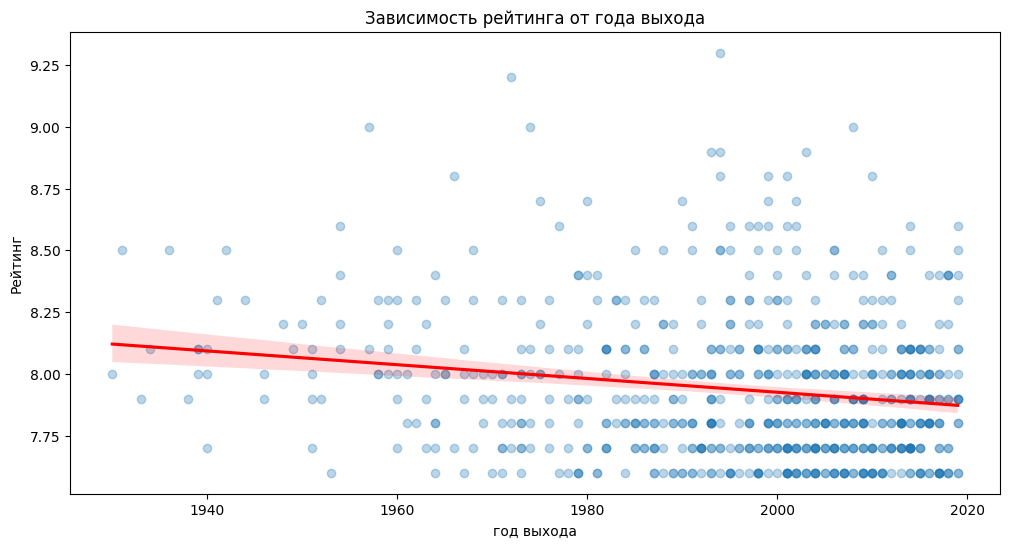

In [ ]:
# Построим график зависимости рейтинга от года выхода
plt.figure(figsize=(12, 6))
sns.regplot(
    x='Released_Year',
    y='IMDB_Rating',
    data = cleaned_imdb_df,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title("Зависимость рейтинга от года выхода")
plt.xlabel("год выхода")
plt.ylabel('Рейтинг')
plt.show()

По графику можно увидеть, что рейтинг снижается с течением времени. Количество выпущенных современных фильмов больше, чем старых. Также современные фильмы стабильнее по рейтингу.

In [ ]:
# Группируем данные
top_directors = cleaned_imdb_df['Director'].value_counts().head(10)
print(top_directors)

Director
Steven Spielberg     13
Martin Scorsese      10
Alfred Hitchcock      9
Clint Eastwood        8
Christopher Nolan     8
Quentin Tarantino     8
David Fincher         8
Woody Allen           7
Hayao Miyazaki        7
Rob Reiner            7
Name: count, dtype: int64


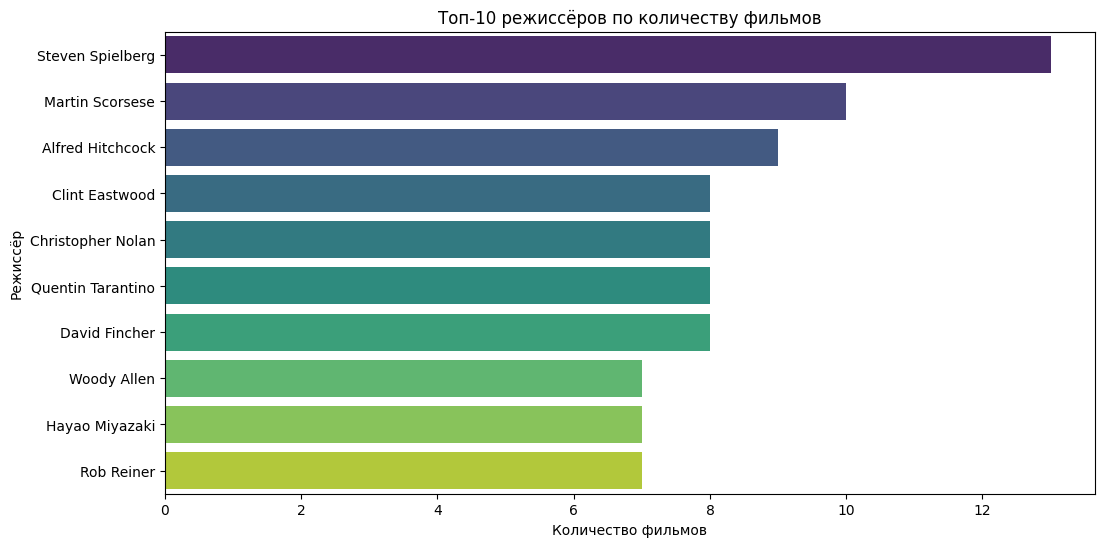

In [ ]:
plt.figure(figsize=(12, 6))

# Преобразуем Series в DataFrame
top_directors_df = top_directors.reset_index()
top_directors_df.columns = ['Director', 'Movie_Count']

sns.barplot(
    x='Movie_Count',
    y='Director',
    data=top_directors_df,
    hue='Director',
    palette='viridis',
    legend=False
)

plt.title("Топ-10 режиссёров по количеству фильмов")
plt.xlabel("Количество фильмов")
plt.ylabel('Режиссёр')
plt.show()

<Axes: ylabel='count'>

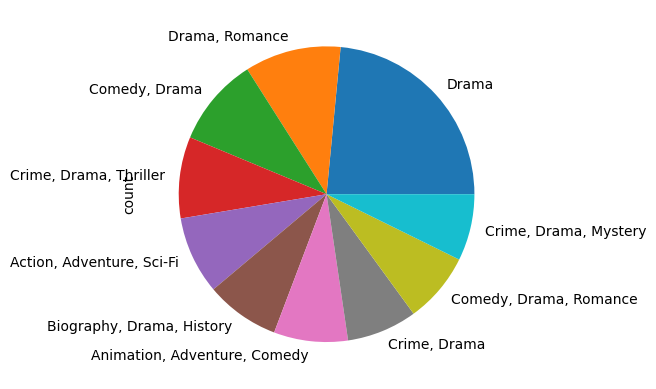

In [11]:
# Создаём диаграмму сравнение рейтнигов по жанрам
cleaned_imdb_df['Genre'].value_counts().head(10).plot(kind='pie')

In [12]:
# Преобразуем столбец Runtime в минуты
cleaned_imdb_df['Runtime'] = cleaned_imdb_df['Runtime'].str.replace(' min', '').astype(int)

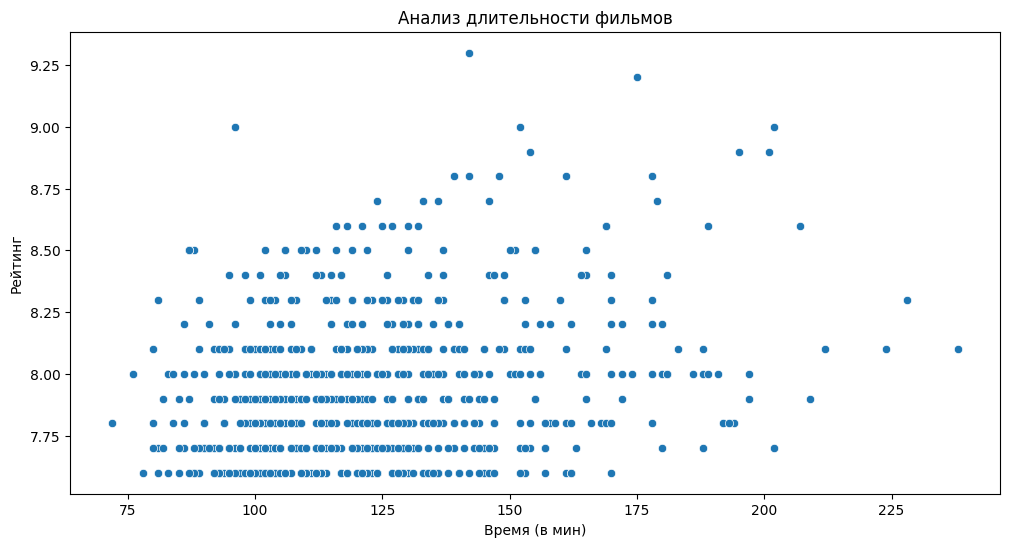

In [24]:
# Анализ длительности фильмов
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Runtime',
    y='IMDB_Rating',
    data=cleaned_imdb_df
)
plt.title("Анализ длительности фильмов")
plt.xlabel('Время (в мин)')
plt.ylabel('Рейтинг')
plt.show()

Связи с рейтингом нету.

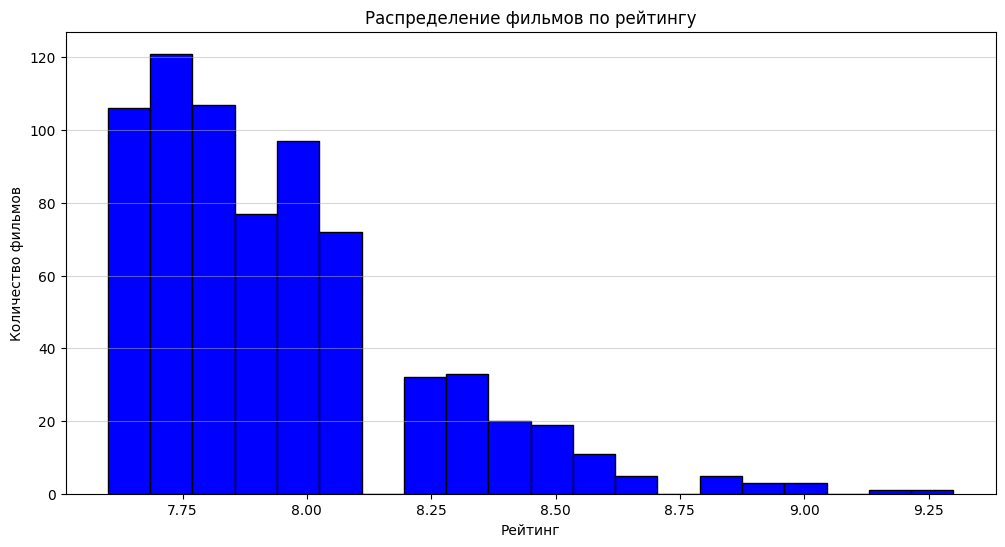

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(
    cleaned_imdb_df['IMDB_Rating'],
    bins = 20,
    color='blue',
    edgecolor='black'
)
plt.xlabel('Рейтинг')
plt.ylabel("Количество фильмов")
plt.title("Распределение фильмов по рейтингу")
plt.grid(axis='y', alpha=0.5)
plt.show()

Больше всего фильмов с рейтингов 7.75.

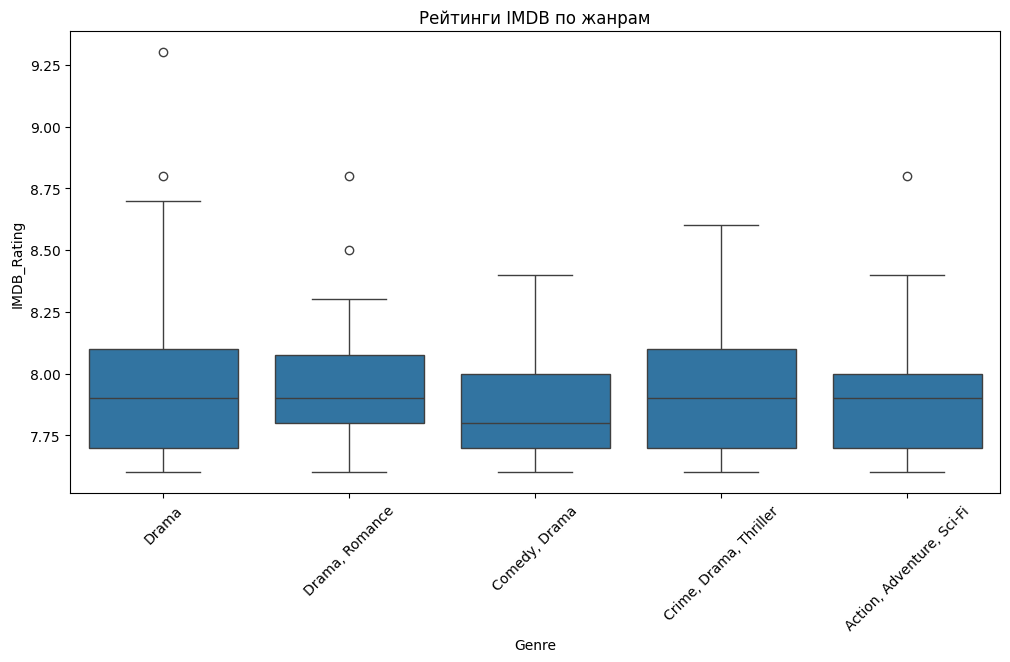

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Genre',
    y='IMDB_Rating',
    data=cleaned_imdb_df,
    order=cleaned_imdb_df['Genre'].value_counts().index[:5]
)
plt.xticks(rotation=45)
plt.title('Рейтинги IMDB по жанрам')
plt.show()

Жанры с элементами драмы получают наиболее высокие и стабильные оценки. Комедии и экшн-фильмы имеют более субъективную оценку зрителей.

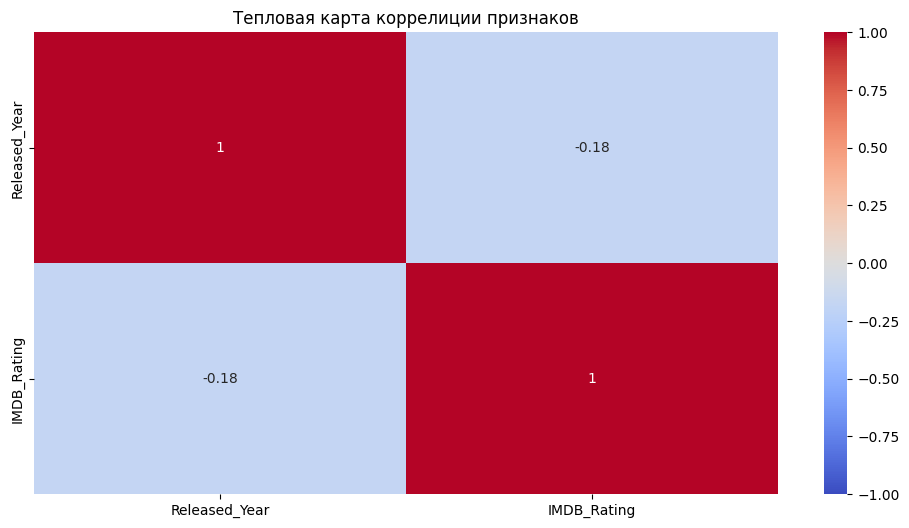

In [23]:
corr_matrix = cleaned_imdb_df[['Released_Year', 'IMDB_Rating']].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Тепловая карта коррелиции признаков')
plt.show()

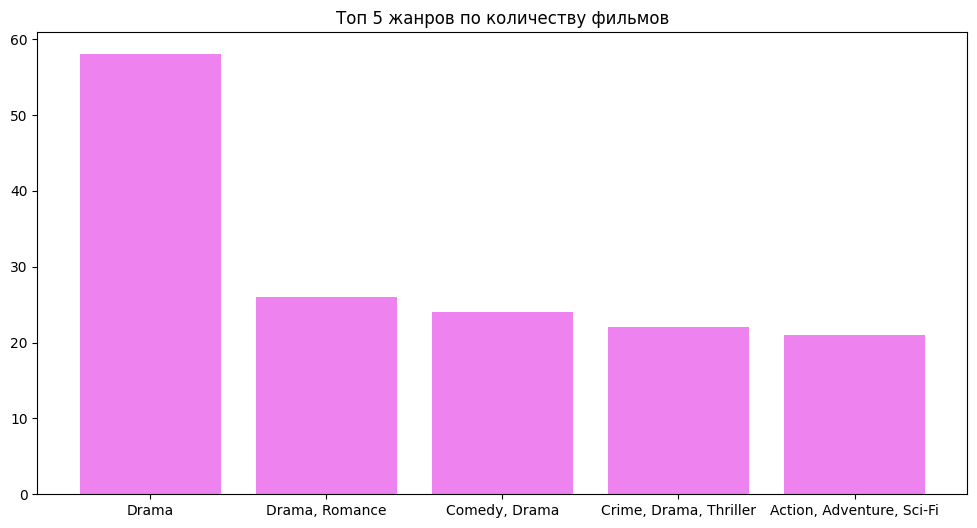

In [17]:
plt.figure(figsize=(12, 6))
top_genres = cleaned_imdb_df['Genre'].value_counts().head(5)
plt.bar(
    top_genres.index,
    top_genres.values,
    color='violet'
)
plt.title("Топ 5 жанров по количеству фильмов")
plt.show()